# Hyperparameter optimization: A benchmark



In [1]:
# show example of random search grid search, and other. comparer nb of trial to reach a given perf on a complicated function
# see also Easom function and eggholder function 

In [227]:
import plotly.plotly as plt
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np

plotly.offline.init_notebook_mode(connected=True)

   
X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y) 

def Z(args):
    X,Y = args
    return (X**2 - 10 * np.cos(2 * np.pi * X)) + \
    (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20


s = np.linspace(0, 2 * np.pi, 240)
t = np.linspace(0, np.pi, 240)
tGrid, sGrid = np.meshgrid(s, t)

X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y)


surface = go.Surface(x=X, y=Y, z=Z((X,Y)))
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)



fig = go.Figure(data=data, layout=layout)
#plt.plot(fig, filename='jupyter-parametric_plot')

plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

## Random search

In [194]:
from hyperopt import fmin,rand, tpe, hp,Trials
import hyperopt

nEval=300

trials = Trials()

searchSpace = [hp.uniform('X', -1000, 1000),
                hp.uniform('Y', -1000, 1000)]

best = fmin(
    fn=Z,
    space=searchSpace,
    algo=rand.suggest,
    max_evals=nEval,
    trials=trials)
print(best)



X_rand = [t['misc']['vals']['X'] for t in trials.trials]
Y_rand = [t['misc']['vals']['Y'] for t in trials.trials]
t = [i for i in range(len(trials.trials))]



100%|██████████| 300/300 [00:00<00:00, 1754.83it/s, best loss: 6882.09502230174] 
{'X': 63.03048068410749, 'Y': 53.925945194188216}


## Tree parzen estimator

100%|██████████| 300/300 [00:01<00:00, 244.84it/s, best loss: 224.77247219952648]
{'X': 10.79354236894006, 'Y': -10.035933652792778}


Text(0, 0.5, 'y')

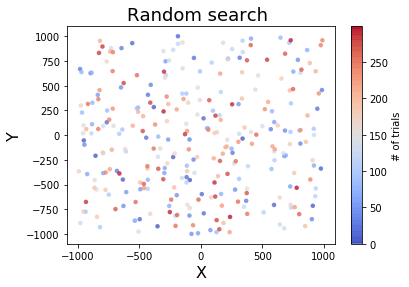

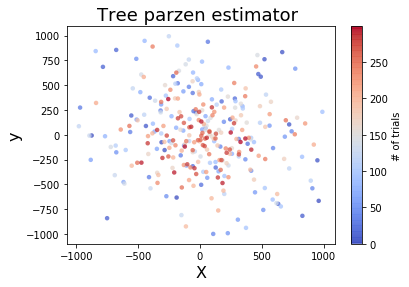

In [195]:


trials = Trials()


searchSpace = [hp.uniform('X', -1000, 1000),
                hp.uniform('Y', -1000, 1000)]

best = fmin(
    fn=Z,
    space=searchSpace,
    algo=tpe.suggest,
    max_evals=nEval,
    trials=trials)
print(best)

X_tpe = [t['misc']['vals']['X'] for t in trials.trials]
Y_tpe = [t['misc']['vals']['Y'] for t in trials.trials]
t = [i for i in range(len(trials.trials))]


#plt.subplot(1, 2, 2)


f, ax = plt.subplots()
s = ax.scatter(np.reshape(X_rand,-1),np.reshape(Y_rand,-1), s=20, linewidth=0.01, alpha=0.75,c=t, cmap=plt.cm.coolwarm)
legend = plt.colorbar(s)
legend.set_label('# of trials')
ax.set_title('Random search ', fontsize=18)
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)

f, ax = plt.subplots()
s = ax.scatter(np.reshape(X_tpe,-1),np.reshape(Y_tpe,-1), s=20, linewidth=0.01, alpha=0.75,c=t, cmap=plt.cm.coolwarm)
ax.set_title('Tree parzen estimator ', fontsize=18)
legend = plt.colorbar(s)
legend.set_label('# of trials')
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('y', fontsize=16)




## Sequential model based optimization using gradient boosted trees.



In [218]:
from skopt import gbrt_minimize

def Z(args):
    X,Y = args
    return (X**2 - 10 * np.cos(2 * np.pi * X)) + \
    (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20


searchSpace = [(-1000, 1000),(-1000, 1000)] 


res = gbrt_minimize(Z, searchSpace, base_estimator=None, n_calls=300, n_random_starts=10, acq_func='EI', acq_optimizer='auto', x0=None, y0=None, random_state=None, verbose=False, callback=None, n_points=10000, xi=0.01, kappa=1.96, n_jobs=1)

C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.

C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.

C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.

C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning:

The objective has been evaluated at this point before.



Text(0, 0.5, 'y')

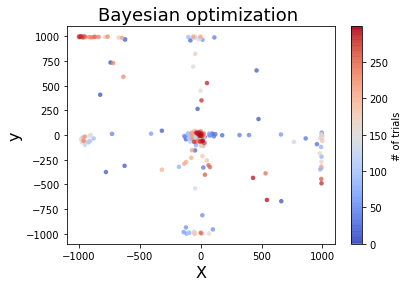

In [219]:
res.x_iters = np.asarray(res.x_iters)

t = [i for i in range(len(res.x_iters))]
f, ax = plt.subplots()
s = ax.scatter(res.x_iters[:,0],res.x_iters[:,1], s=20, linewidth=0.01, alpha=0.75,c=t, cmap=plt.cm.coolwarm)
ax.set_title('Bayesian optimization ', fontsize=18)
legend = plt.colorbar(s)
legend.set_label('# of trials')
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('y', fontsize=16)

In [ ]:
# 5 different function 10 runs for each method until 300
#https://en.wikipedia.org/wiki/Test_functions_for_optimization

## Bayesian optimization with gaussian processes


In [194]:
from sklearn.base import clone
from skopt import gp_minimize
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern

def Z(args):
    X,Y = args
    return (X**2 - 10 * np.cos(2 * np.pi * X)) + \
    (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20


# Use custom kernel and estimator to match previous example
k =  C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
#gpr = GaussianProcessRegressor(kernel=k, alpha=noise**2)

searchSpace = [(-1000, 1000),(-1000, 1000)] 

res = gp_minimize(Z, 
                dimensions = bounds,
                #base_estimator=gpr,
                acq_func='EI',      # expected improvement
                xi=0.1,            # exploitation-exploration trade-off
                n_calls=300,         # number of iterations
                n_random_starts=10  # initial samples are not provided
                )

#from skopt.plots import plot_convergence
#plot_convergence(res)

KeyboardInterrupt: 

Text(0, 0.5, 'y')

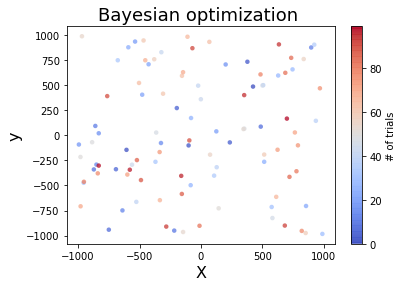

In [192]:
res.x_iters = np.asarray(res.x_iters)

t = [i for i in range(len(res.x_iters))]
f, ax = plt.subplots()
s = ax.scatter(res.x_iters[:,0],res.x_iters[:,1], s=20, linewidth=0.01, alpha=0.75,c=t, cmap=plt.cm.coolwarm)
ax.set_title('Bayesian optimization ', fontsize=18)
legend = plt.colorbar(s)
legend.set_label('# of trials')
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('y', fontsize=16)

## bof!

The results are poor without a proper tuning, need to find the kernel and gaussian process params first!

In [232]:
# does not seem to work well
# read http://krasserm.github.io/2018/03/21/bayesian-optimization/

# simple library for sequential model-based optimization.
#!pip install scikit-optimize   

import numpy as np
from sklearn.base import clone
# from skopt import gp_minimize
# from skopt.learning import GaussianProcessRegressor
# from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern




from scipy.stats import norm

def expected_improvement(X, X_sample, Z_sample, gpr, xi=0.01):
    ''' Computes the EI at points X based on existing samples X_sample and Y_sample using a Gaussian process surrogate model. Args: X: Points at which EI shall be computed (m x d). X_sample: Sample locations (n x d). Y_sample: Sample values (n x 1). gpr: A GaussianProcessRegressor fitted to samples. xi: Exploitation-exploration trade-off parameter. Returns: Expected improvements at points X. '''
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample = gpr.predict(X_sample)

    #sigma = sigma.reshape(-1, X_sample.shape[1])
    
    # Needed for noise-based model,
    # otherwise use np.max(Y_sample).
    # See also section 2.4 in [...]
    mu_sample_opt = np.min(mu_sample)

    with np.errstate(divide='warn'):
        imp = mu_sample_opt-mu  - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0

    return ei



from scipy.optimize import minimize

def propose_location(acquisition, X_sample, Z_sample, gpr, bounds, n_restarts=25):
    ''' Proposes the next sampling point by optimizing the acquisition function. Args: acquisition: Acquisition function. X_sample: Sample locations (n x d). Y_sample: Sample values (n x 1). gpr: A GaussianProcessRegressor fitted to samples. Returns: Location of the acquisition function maximum. '''
    dim = X_sample.shape[1]
    min_val = 1
    min_x = None
    
    def min_obj(X):
        # Minimization objective is the negative acquisition function
        return -acquisition(X.reshape(-1, dim), X_sample, Z_sample, gpr)
    
    # Find the best optimum by starting from n_restart different random points.
    for x0 in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, dim)):
        res = minimize(min_obj, x0=x0, bounds=bounds, method='L-BFGS-B')        
        if res.fun < min_val:
            min_val = res.fun[0]
            min_x = res.x           
            
    return min_x

In [233]:
#Another manual trial for gaussian processes

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern

bounds = np.array([[-1000, 1000],[-1000, 1000]]) # search space
noise = 0


# Gaussian process with Matern kernel as surrogate model
k =  C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=k, alpha=noise**2)

X_init = np.array([[np.random.uniform(-1000,1000),np.random.uniform(-1000,1000)]])
Z_init = Z(*X_init).ravel()
X_sample = X_init
Z_sample = Z_init 

# Number of iterations
n_iter = 200

for i in range(n_iter):
    # Update Gaussian process with existing samples
    gpr.fit(X_sample, Z_sample)

    # Obtain next sampling point from the acquisition function (expected_improvement)
    X_next = propose_location(expected_improvement, X_sample, Z_sample, gpr, bounds)
    
    # Obtain next noisy sample from the objective function
    Z_next = Z(X_next)
    

    # Add sample to previous samples
    X_sample = np.vstack((X_sample, X_next))
    Z_sample = np.vstack((Z_sample, Z_next))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning:

divide by zero encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning:

divide by zero encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning:

divide by zero encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning:

divide by zero encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning:

divide by zero encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning:

divide by zero encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning:

divide by zero encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning:

divide by z

Text(0, 0.5, 'y')

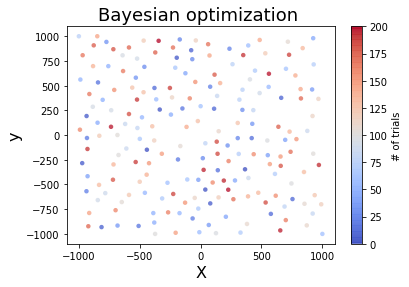

In [234]:
t = [i for i in range(len(X_sample))]
f, ax = plt.subplots()
s = ax.scatter(X_sample[:,0],X_sample[:,1], s=20, linewidth=0.01, alpha=0.75,c=t, cmap=plt.cm.coolwarm)
ax.set_title('Bayesian optimization ', fontsize=18)
legend = plt.colorbar(s)
legend.set_label('# of trials')
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('y', fontsize=16)